In [77]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/AI/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


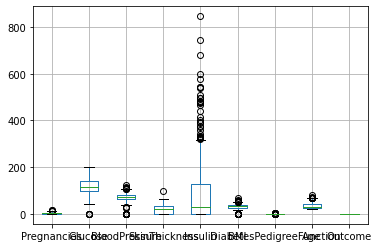

In [83]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed4f9c0d0>]],
      dtype=object)

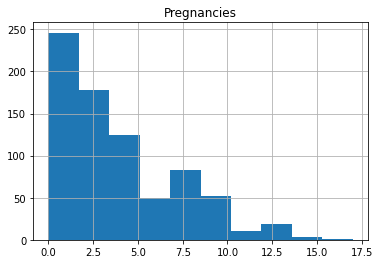

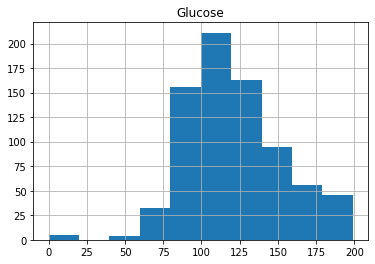

In [84]:
df.hist('Pregnancies')
df.hist('Glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed4e37d50>]],
      dtype=object)

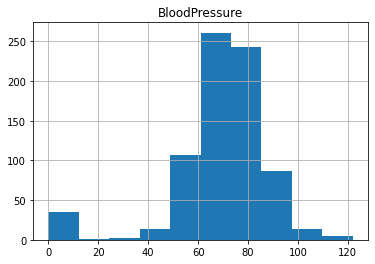

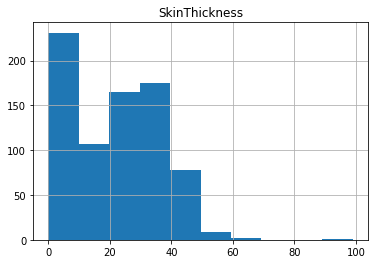

In [85]:
df.hist('BloodPressure')
df.hist('SkinThickness')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed4d4c590>]],
      dtype=object)

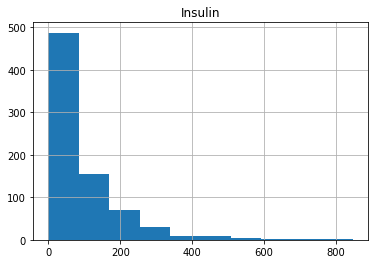

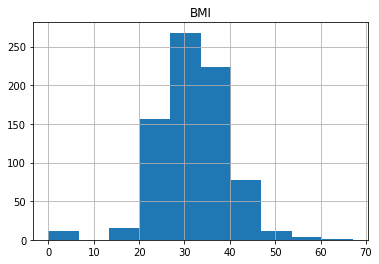

In [86]:
df.hist('Insulin')
df.hist('BMI')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed4c5e410>]],
      dtype=object)

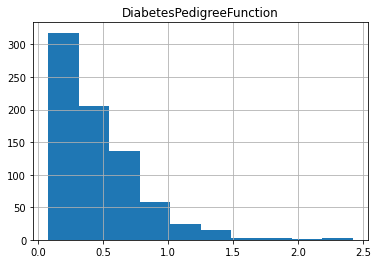

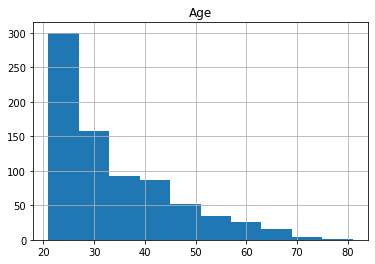

In [87]:
df.hist('DiabetesPedigreeFunction')
df.hist('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed25b7b50>]],
      dtype=object)

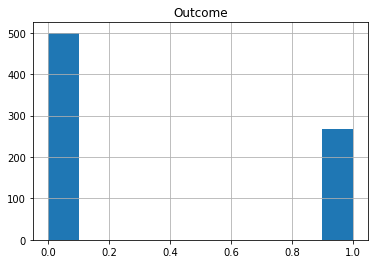

In [88]:
df.hist('Outcome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feed25e9c50>,
      dtype=object)

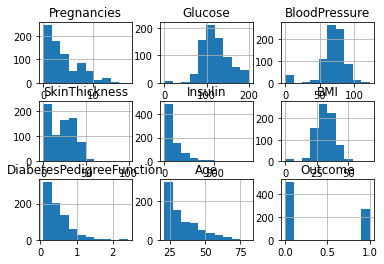

In [89]:
df.hist()

In [90]:
df.shape

(768, 9)

In [91]:
#The features are: Pregnancies,	Glucose,	BloodPressure	,SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction,	Age	
#The Target variable is Outcome.
#That is whether the person is diabetic or no 
#1 denotes the person is diabetic and 0 denotes the person is non diabetic

In [92]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8].values
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [93]:
x_test.shape

(231, 8)

In [94]:
x_train.shape

(537, 8)

In [95]:
y_test.shape

(231,)

In [96]:
y_train.shape

(537,)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [98]:
from tensorflow import keras
from keras import layers

In [99]:
model= keras.Sequential() 

model.add(layers.Dense(32, input_dim=8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.get_weights()

[array([[ 0.01391393, -0.26550287,  0.30352783, -0.02764875,  0.21898115,
         -0.06478947, -0.34288082, -0.33846092,  0.18829256,  0.0720064 ,
         -0.24203478,  0.05639085,  0.35858595, -0.3864069 ,  0.1101217 ,
         -0.2516564 ,  0.12642336,  0.00307462, -0.21502614, -0.25961494,
         -0.04406431, -0.14114386,  0.09272844,  0.32767856, -0.00372773,
         -0.1460936 ,  0.19031656,  0.30643946, -0.09249553, -0.169811  ,
          0.12476104,  0.05625817],
        [ 0.04264727, -0.09885946, -0.00837249, -0.15590085, -0.2978319 ,
          0.11271936,  0.06686699,  0.20047146,  0.2721135 ,  0.08873606,
          0.06773371, -0.15933125,  0.32209402, -0.1607675 ,  0.28573316,
         -0.37150162, -0.18613037,  0.30577046,  0.08162197,  0.02731454,
          0.25650173, -0.29302102,  0.27607077,  0.37917233, -0.13795243,
          0.11992949,  0.0649519 ,  0.18490243, -0.07367414,  0.30560225,
          0.3279121 , -0.30211008],
        [-0.02745399,  0.31784093, -0.13

In [102]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
model.fit(x_train_scaled,y_train,epochs=400)
#default batch size is 32

Epoch 1/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5717
Epoch 2/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6629
Epoch 3/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7132
Epoch 4/400
17/17 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7449
Epoch 5/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7542
Epoch 6/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7561
Epoch 7/400
17/17 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7672
Epoch 8/400
17/17 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7635
Epoch 9/400
17/17 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7672
Epoch 10/400
17/17 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7709
Epoch 11/

In [104]:
s=model.evaluate(x_train_scaled,y_train)
s

17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9646


[0.12160159647464752, 0.9646182656288147]

In [105]:
d=model.evaluate(x_test_scaled,y_test)
d

8/8 [==============================] - 0s 2ms/step - loss: 1.0035 - accuracy: 0.7273


[1.0035408735275269, 0.7272727489471436]

In [106]:
model.get_weights()

[array([[ 0.10634735, -1.1486117 ,  0.58864254,  0.07330029,  0.4850893 ,
          0.09102525, -0.25168362, -0.6683914 , -0.01276905, -0.19602586,
         -0.64449847,  0.19707622,  0.3978373 , -1.1447294 ,  0.19468462,
         -0.49003613, -0.51993775,  0.0378213 , -0.48978254, -0.29894292,
          0.21681069, -0.32051653,  0.48394752,  0.48053566,  0.02847951,
         -0.69954836,  0.8010639 ,  0.71017224,  0.17250308, -0.0234729 ,
         -0.4680301 ,  0.2312271 ],
        [ 0.4517498 , -0.17208788,  0.17086287, -0.44376332, -0.4353899 ,
          0.4430623 ,  0.09913804,  0.5863122 ,  0.4082365 , -0.06027249,
          0.1619503 , -0.35392568,  0.40147495, -0.10323001,  0.46068668,
         -1.2213761 , -0.09608326,  0.30026478, -0.17996071,  0.4003455 ,
          0.475277  , -0.91641784,  0.14543457,  0.787545  , -0.3519451 ,
          0.13362858,  0.03870619, -0.1799704 , -0.24847008,  0.85556656,
          0.8775043 , -0.43762198],
        [-0.29944232,  0.584265  ,  0.10

In [107]:
y_pred=model.predict(x_test_scaled)
y_pred

array([[9.99978185e-01],
       [2.45153904e-03],
       [2.67326832e-03],
       [7.95390427e-01],
       [7.29570985e-02],
       [9.72718000e-04],
       [1.00000000e+00],
       [9.68903422e-01],
       [8.13058972e-01],
       [5.69275439e-01],
       [9.98201609e-01],
       [6.78880095e-01],
       [1.53514475e-01],
       [1.82814628e-01],
       [1.11713707e-02],
       [2.63333231e-01],
       [9.99992013e-01],
       [2.81766057e-03],
       [5.53355277e-01],
       [3.74950469e-01],
       [9.96942878e-01],
       [5.45203686e-04],
       [5.95281005e-01],
       [3.04094970e-01],
       [1.52349472e-04],
       [6.77902997e-02],
       [6.66886568e-04],
       [1.00000000e+00],
       [5.51733077e-02],
       [7.99694657e-03],
       [1.65949345e-01],
       [2.62210280e-01],
       [1.62857771e-03],
       [9.69489276e-01],
       [1.12679601e-03],
       [8.96782041e-01],
       [9.53188181e-01],
       [1.22517173e-04],
       [7.78600693e-01],
       [9.89246726e-01],


In [108]:
y_pred=model.predict(x_test_scaled)
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [109]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [110]:
y_pred.shape

(231, 1)

In [111]:
y_test.shape

(231,)

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import numpy as np
y_pred=model.predict(x_test_scaled)
y_pred=(y_pred>0.5)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[126  31]
 [ 32  42]]
0.7272727272727273
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.58      0.57      0.57        74

    accuracy                           0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



In [113]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.2727272727272727


In [114]:
model.save('diabetes.h5')